In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import *
from math import gamma

In [2]:
def laplace_pdf(x):
    return laplace.pdf(x, 0, 1 / np.sqrt(2))

def uniform_pdf(x):
    return uniform.pdf(x, -np.sqrt(3), 2 * np.sqrt(3))

def poisson_pdf(k):
    return np.exp(-10) * np.power(10, k) / gamma(k + 1)

distr_pdf = {
    'standard_normal' : norm.pdf,
    'standard_cauchy' : cauchy.pdf,
    'laplace' : laplace_pdf,
    'uniform' : uniform_pdf,
    'poisson' : poisson_pdf
}

def laplace_gen(n):
    return np.random.laplace(0, 1 / np.sqrt(2), n)

def uniform_gen(n):
    return np.random.uniform(-np.sqrt(3), np.sqrt(3), n)

def poisson_gen(n):
    return np.random.poisson(10, n)

distr_gen = {
    'standard_normal' : np.random.standard_normal,
    'standard_cauchy' : np.random.standard_cauchy,
    'laplace' : laplace_gen,
    'uniform' : uniform_gen,
    'poisson' : poisson_gen
}

def laplace_cdf(x):
    return laplace.cdf(x, 0, 1 / np.sqrt(2))

def uniform_cdf(x):
    return uniform.cdf(x, -np.sqrt(3), 2 * np.sqrt(3))

def poisson_cdf(k):
    return poisson.cdf(k, 10)

distr_cdf = {
    'standard_normal' : norm.cdf,
    'standard_cauchy' : cauchy.cdf,
    'laplace' : laplace_cdf,
    'uniform' : uniform_cdf,
    'poisson' : poisson_cdf
}

def get_values_in_range(X, a, b):
    D = []
    
    for x in X:
        if a <= x <= b:
            D.append(x)
    
    return D

def silverman_h(X):
    return 1.06 * np.std(X) * n**(-1 / 5)

def K(u):
    return norm.pdf(u)

def KDE(u, X, h):
    n = len(X)
    s = 0
    
    for i in range(n):
        s += K((u - X[i]) / h)
    
    return s / (n * h)

power = [20, 60, 100]
np.random.seed(0)

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:26: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<Figure size 864x504 with 0 Axes>

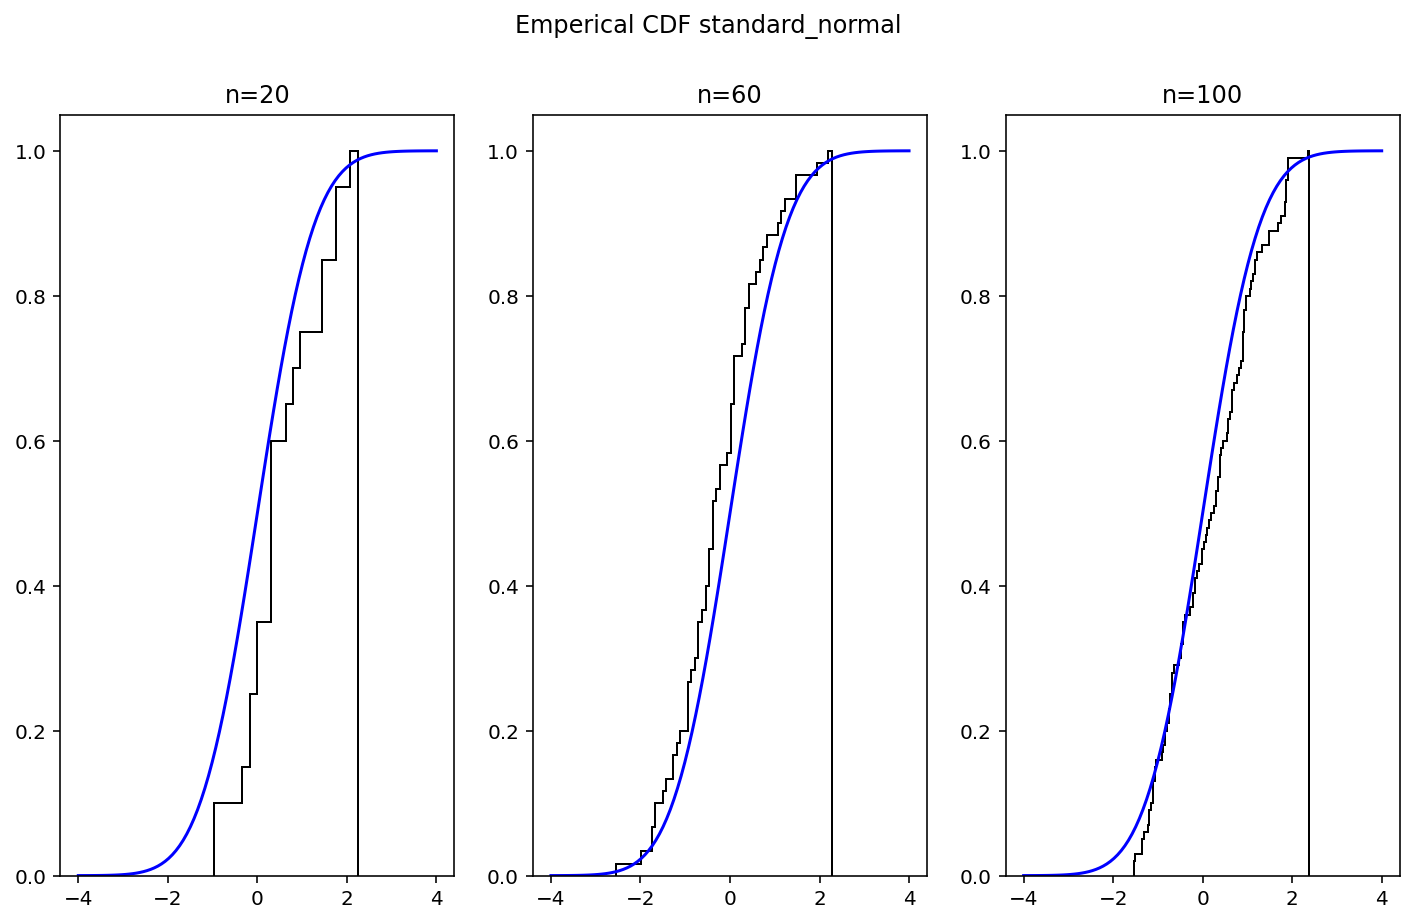

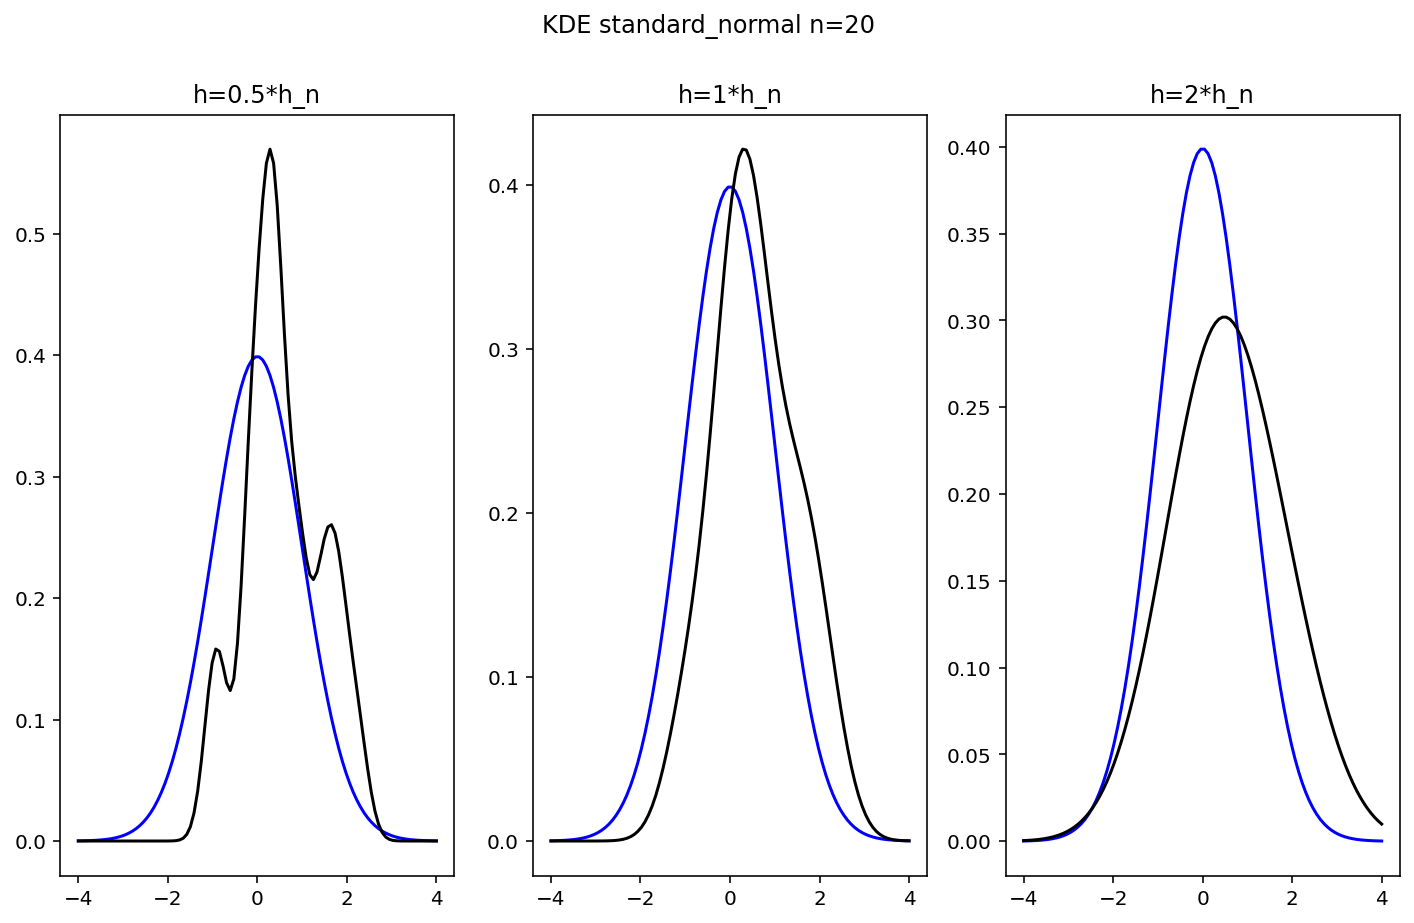

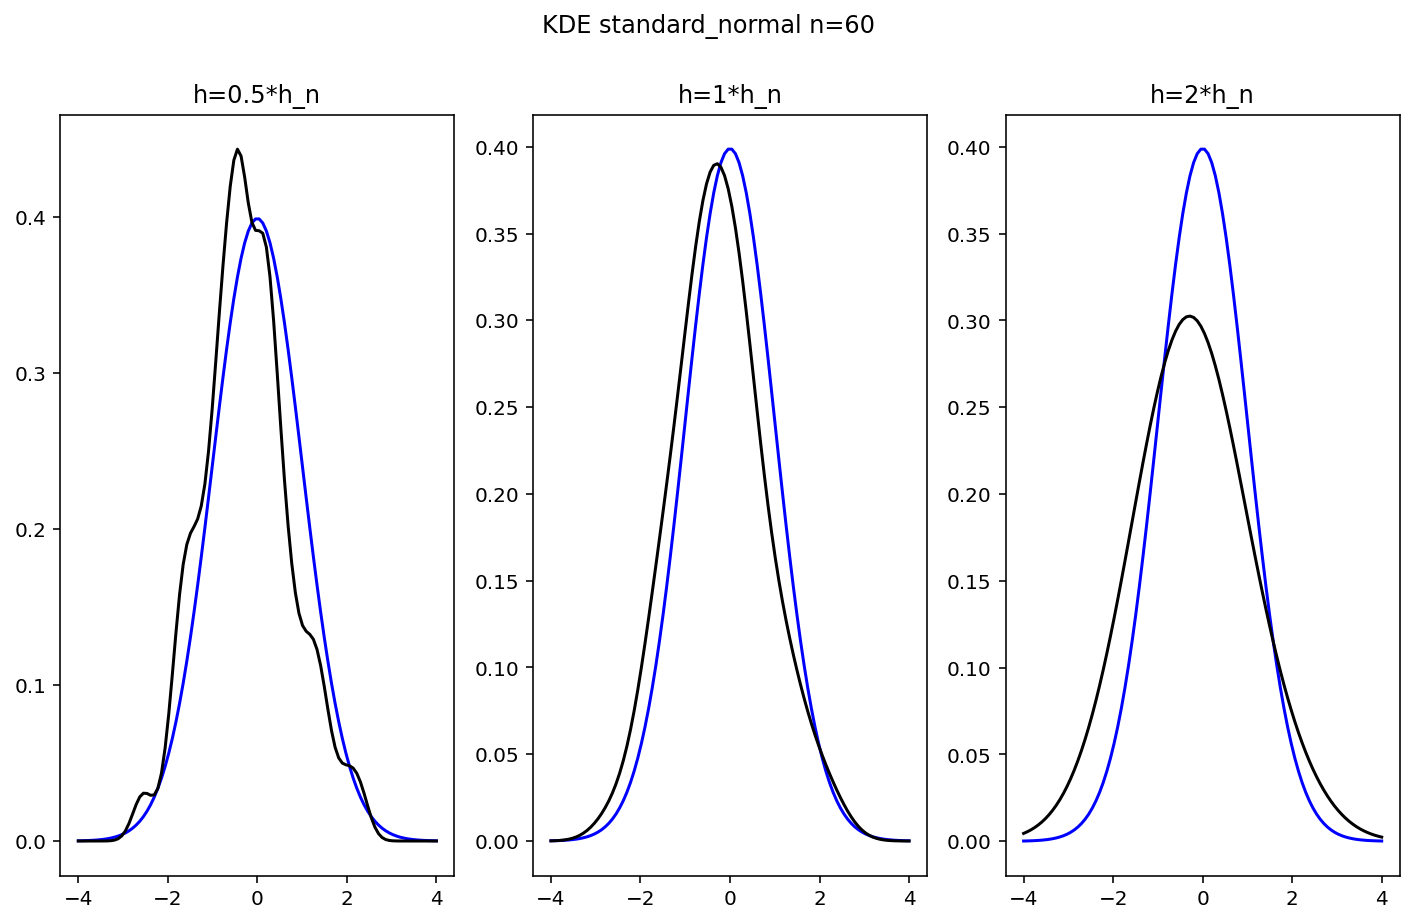

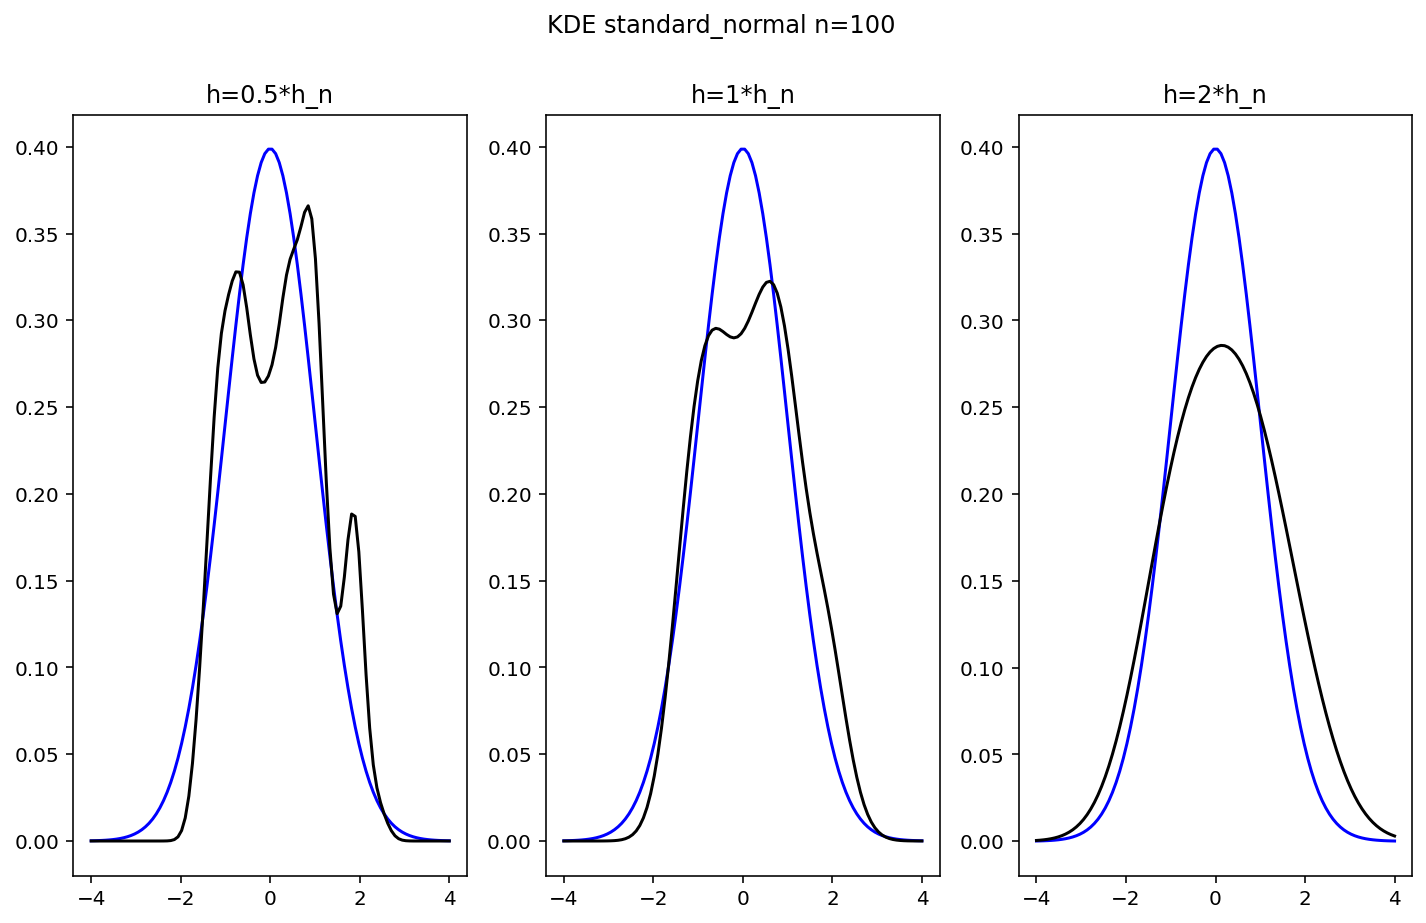

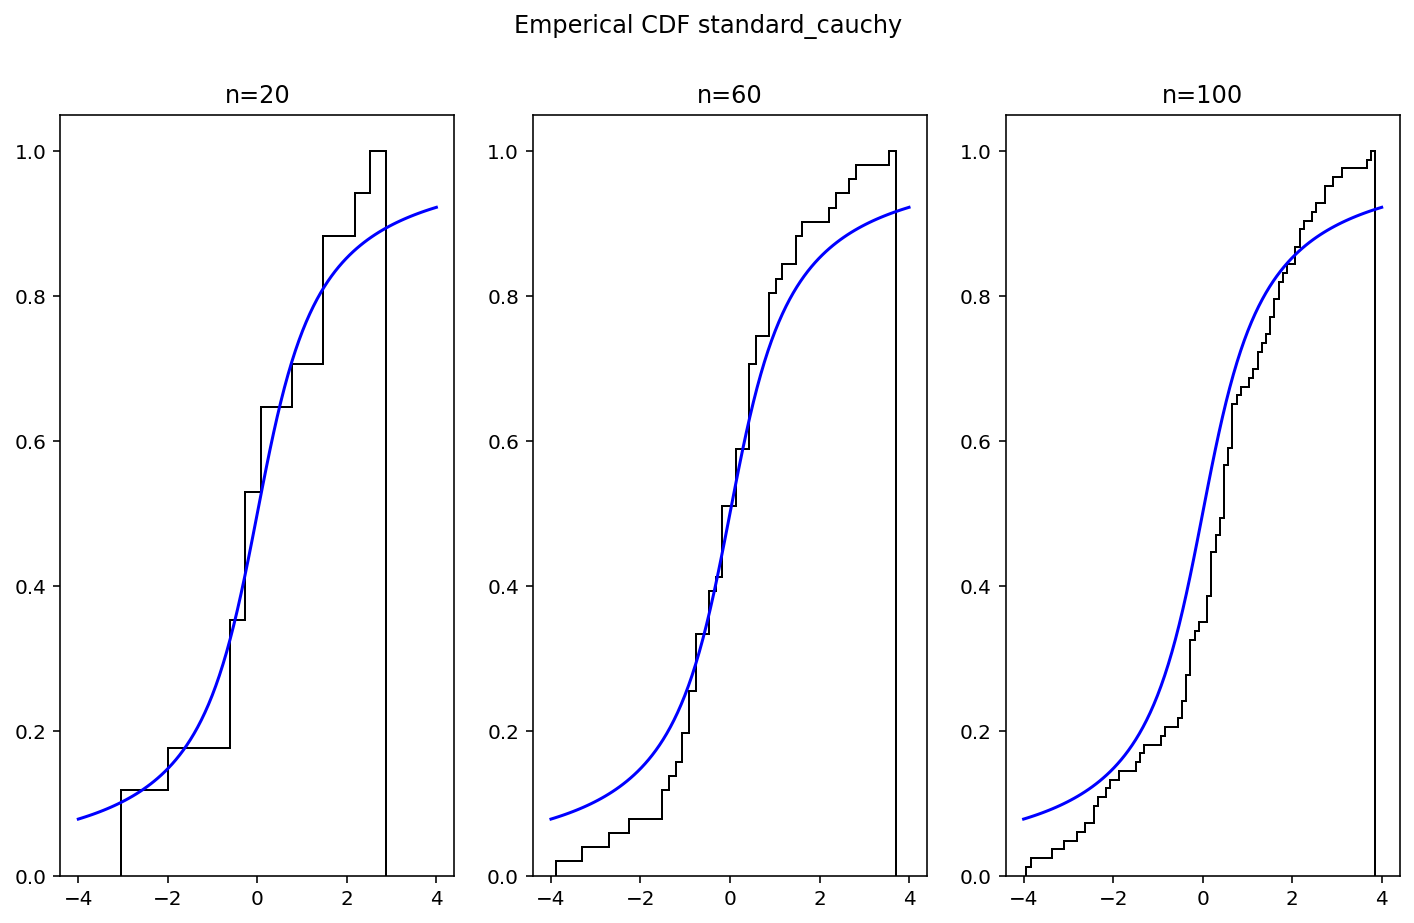

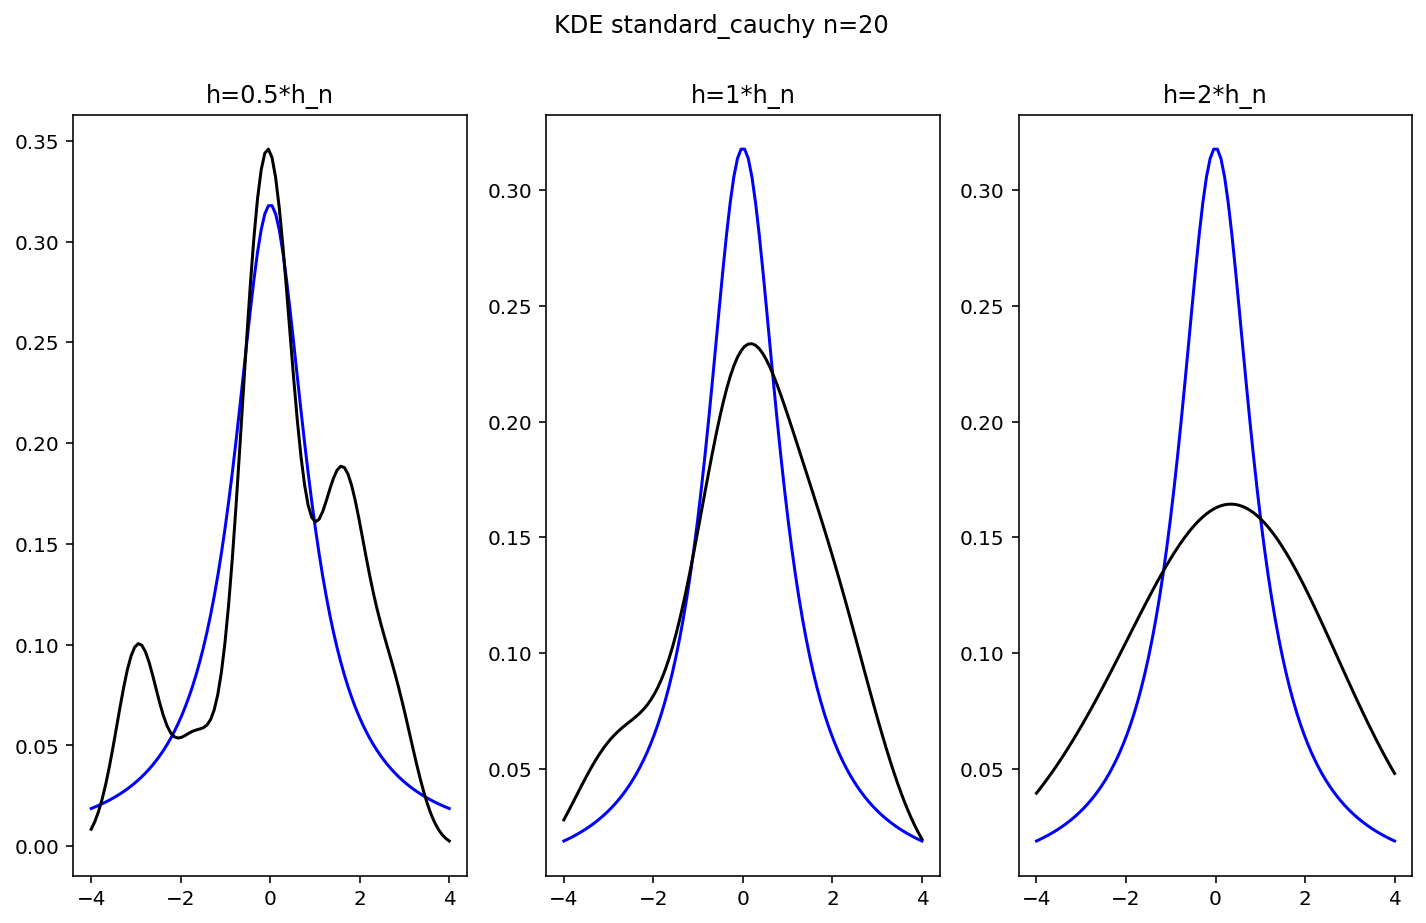

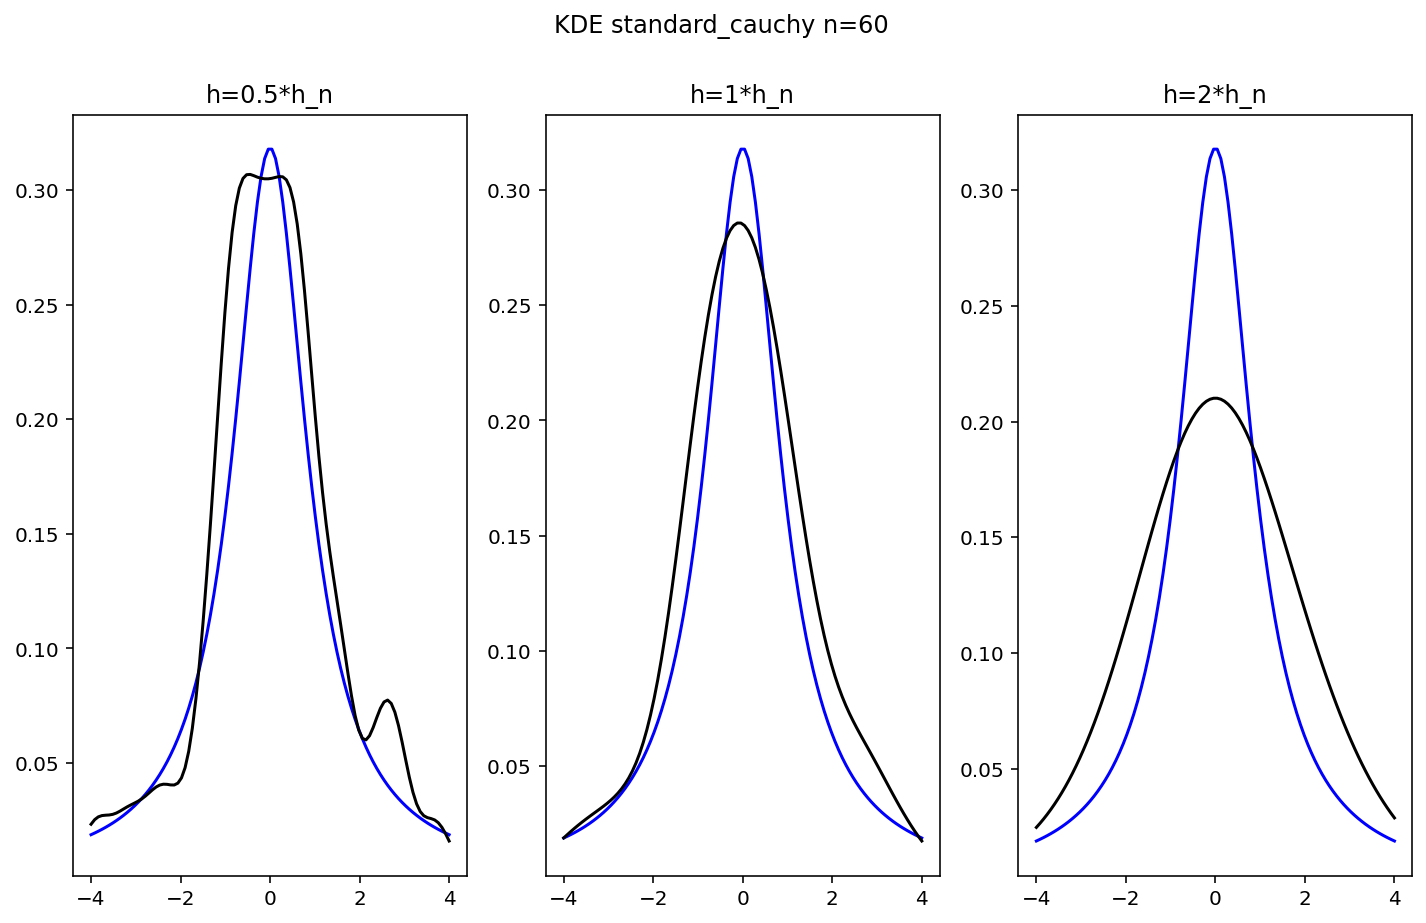

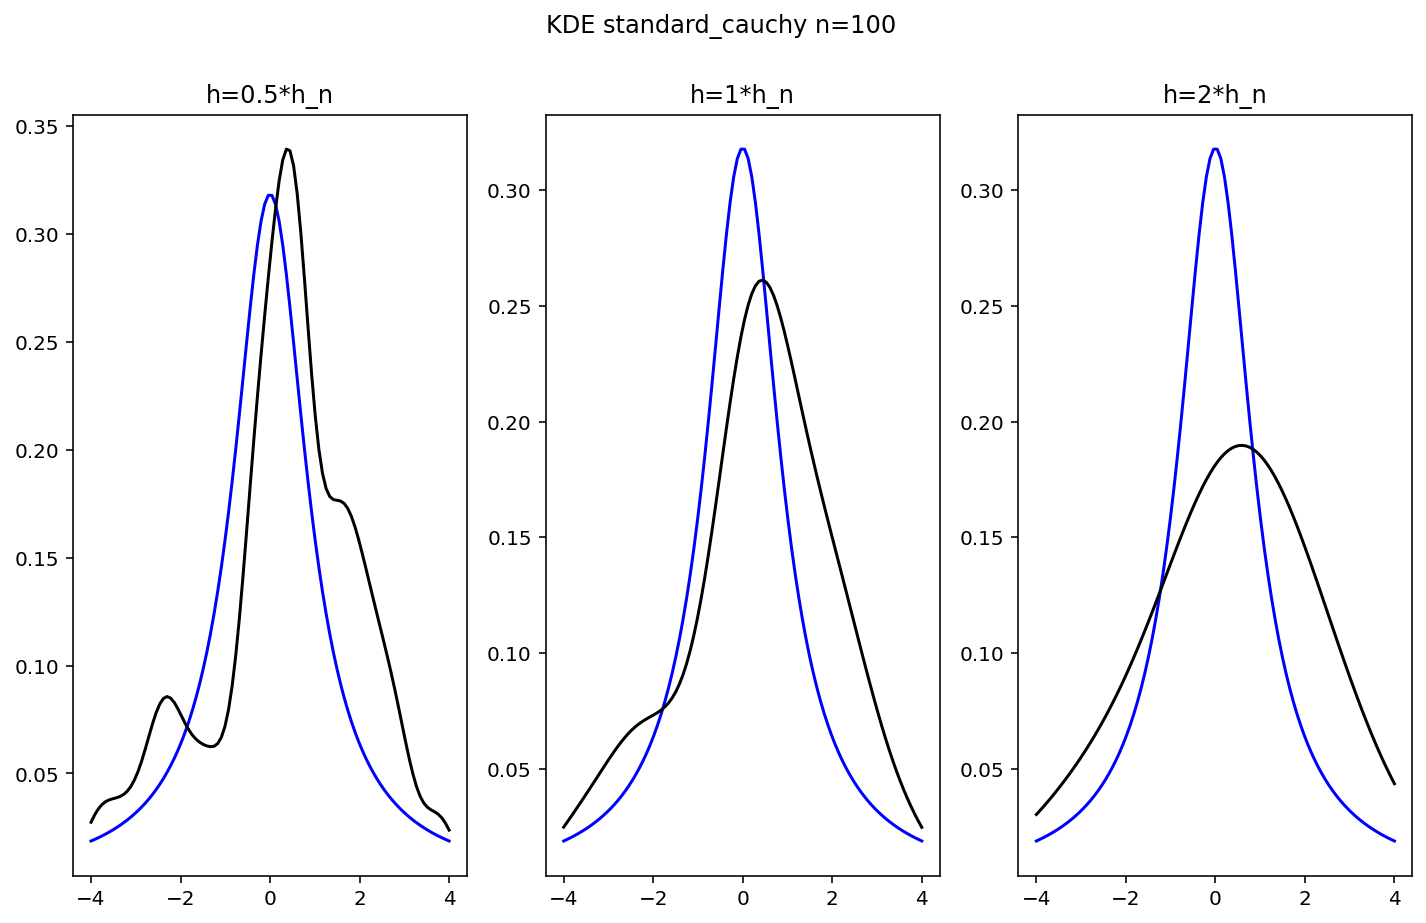

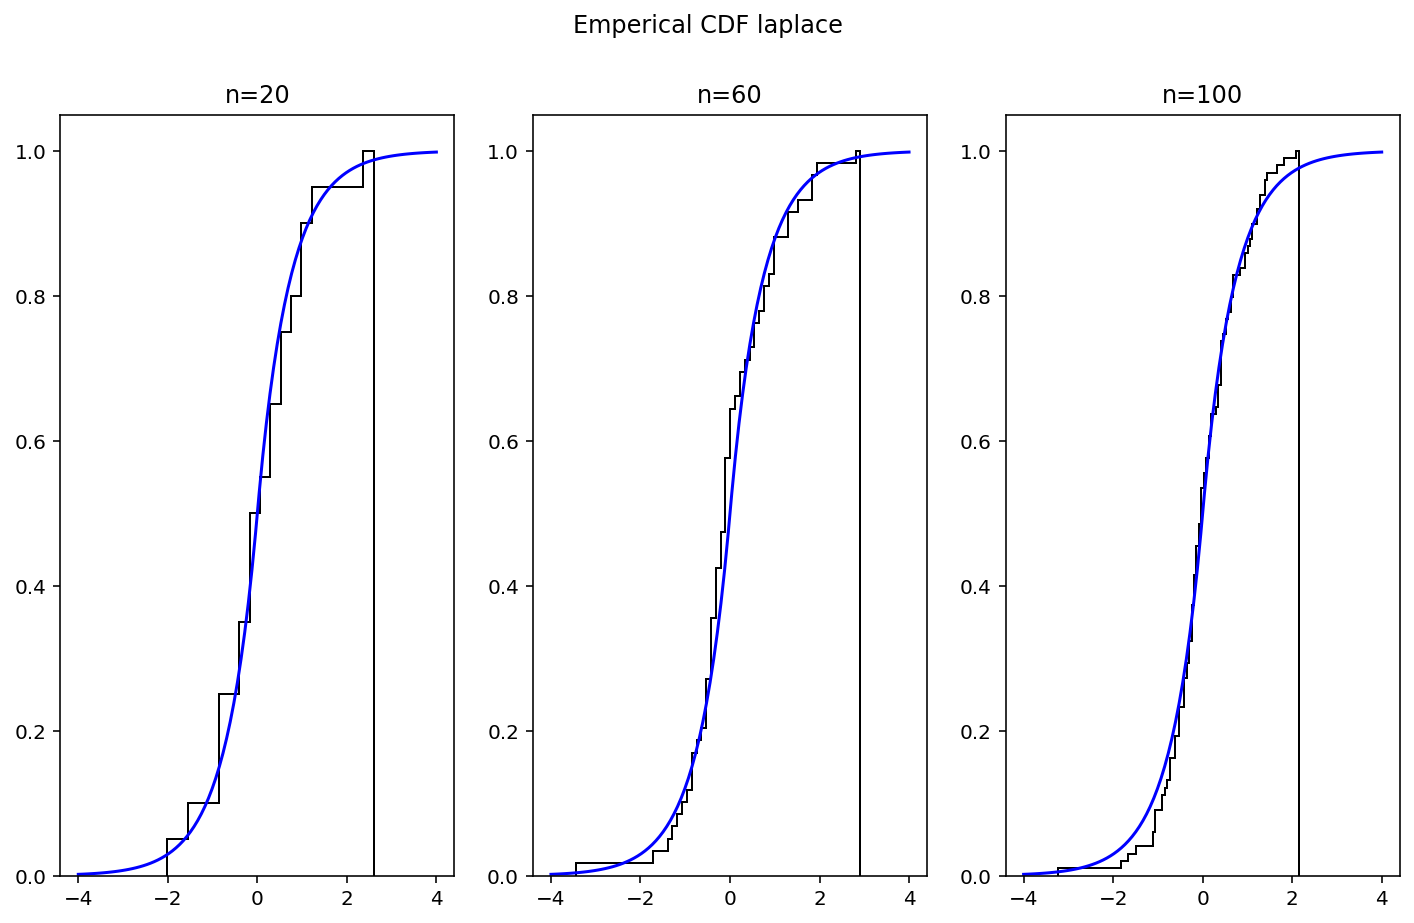

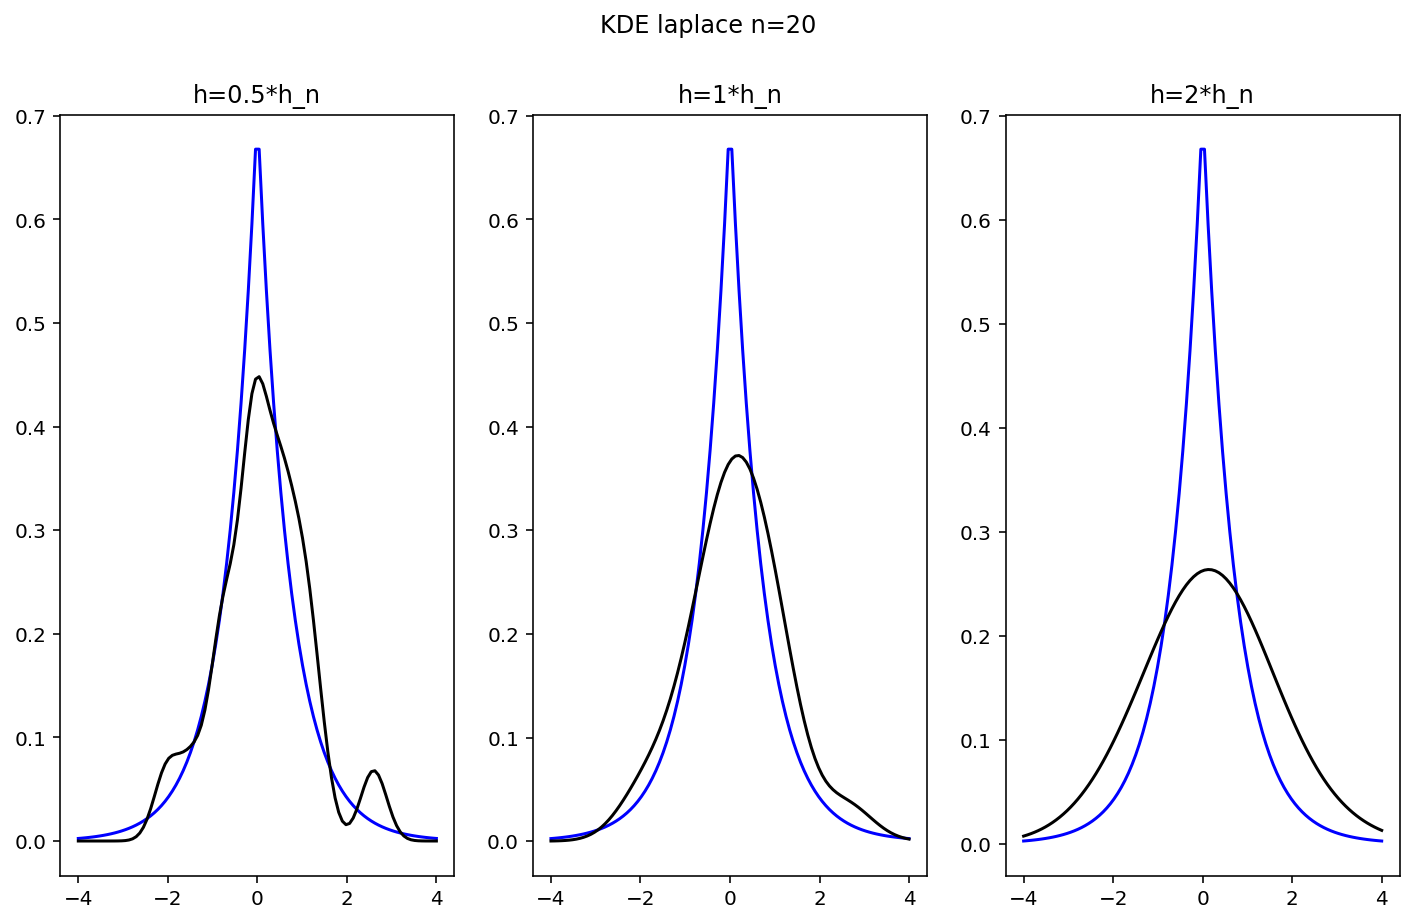

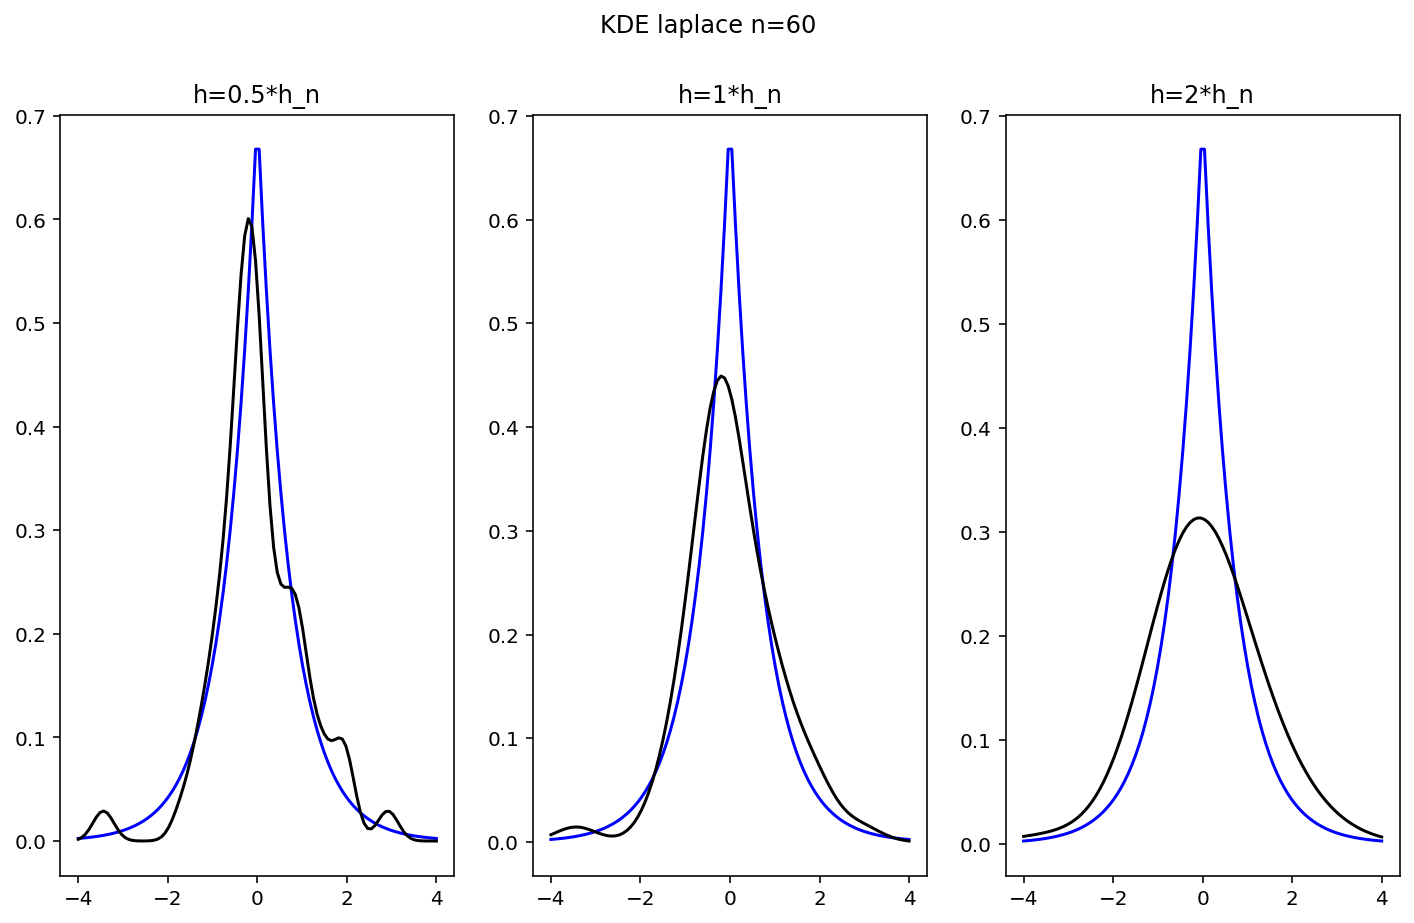

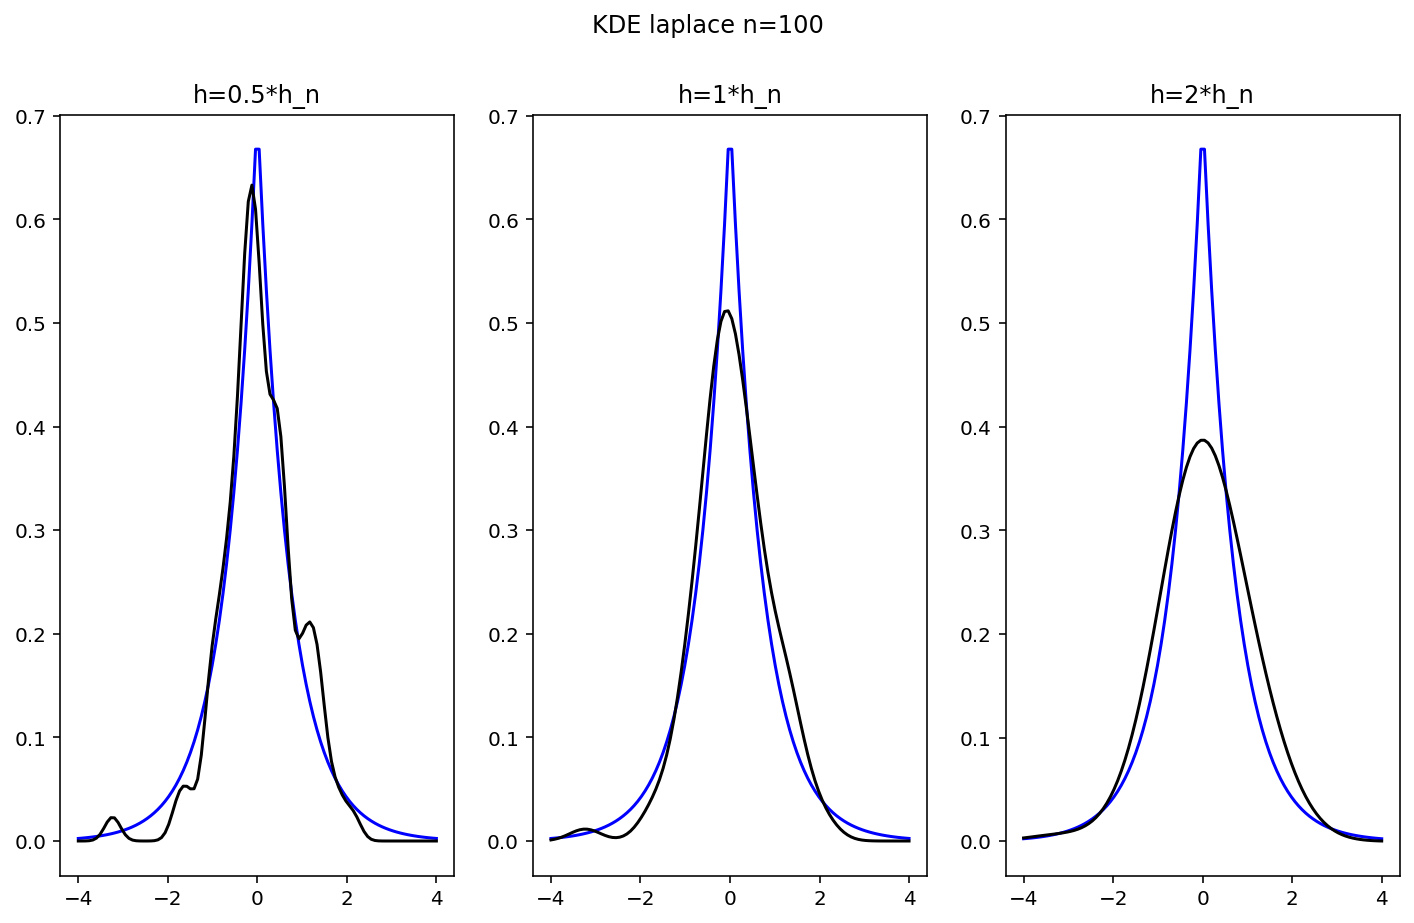

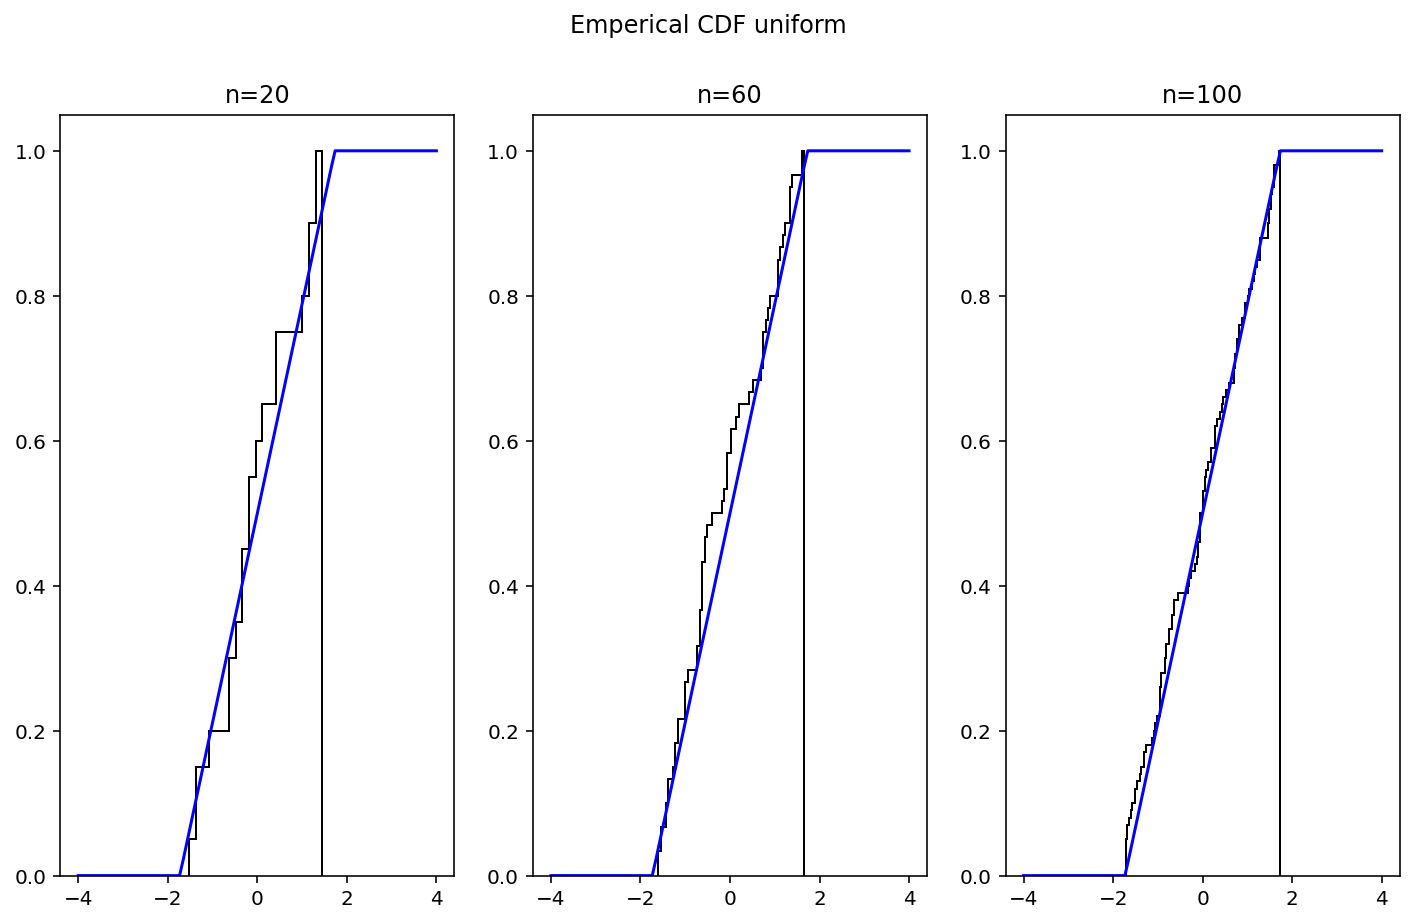

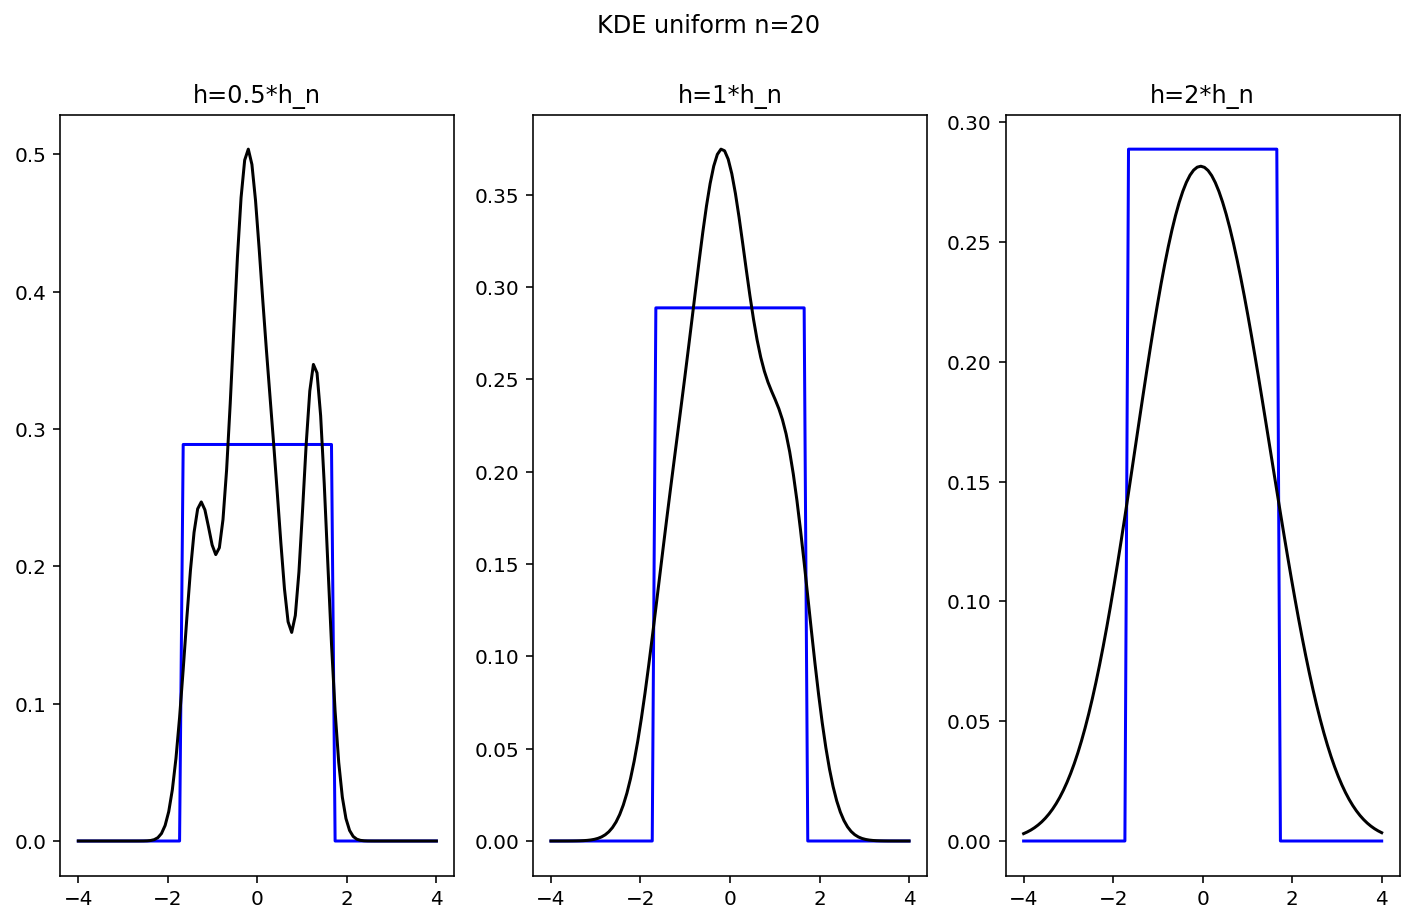

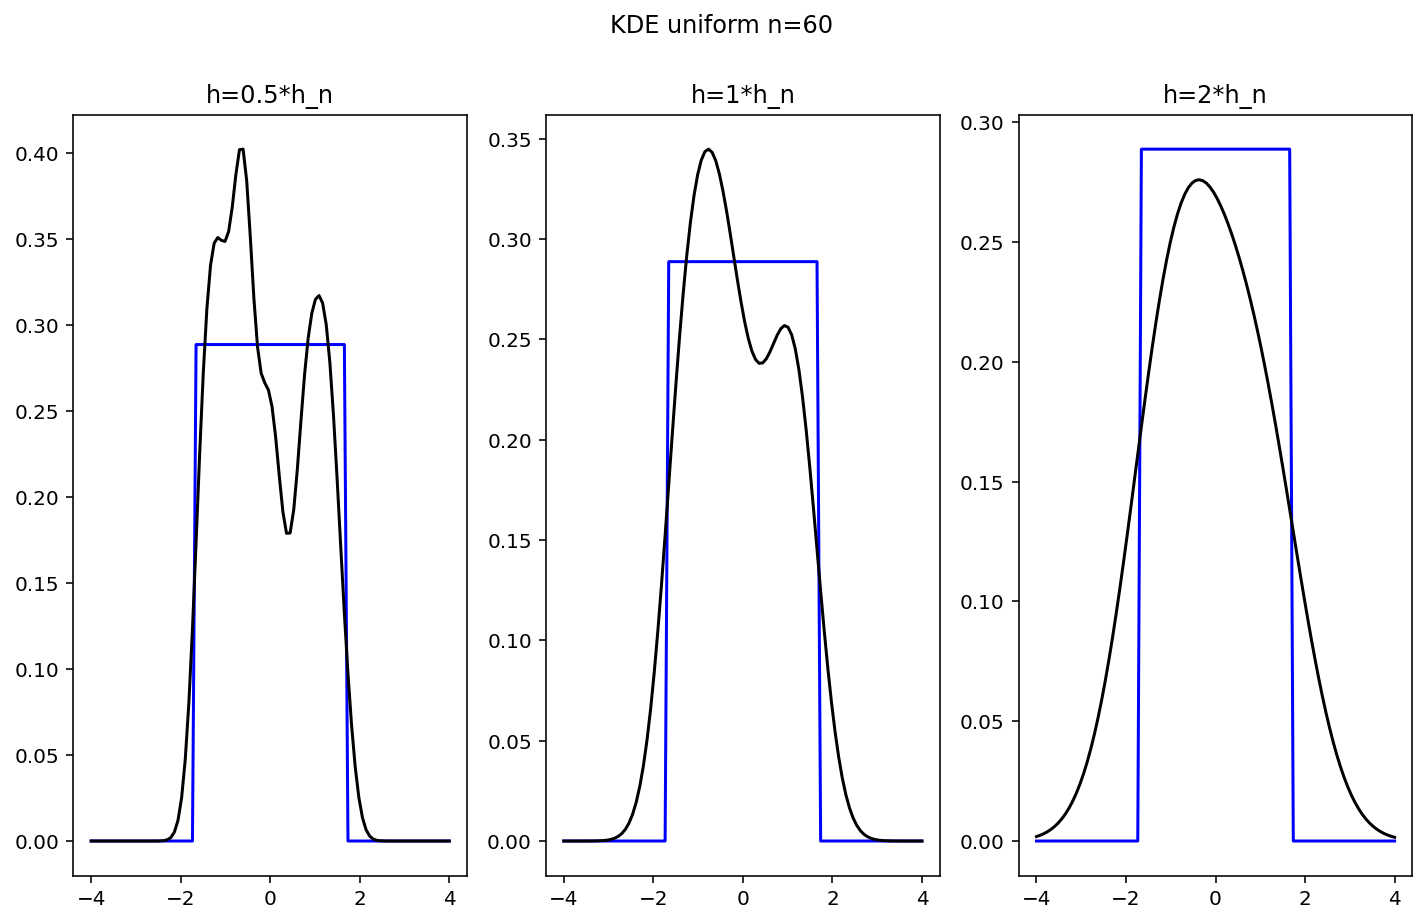

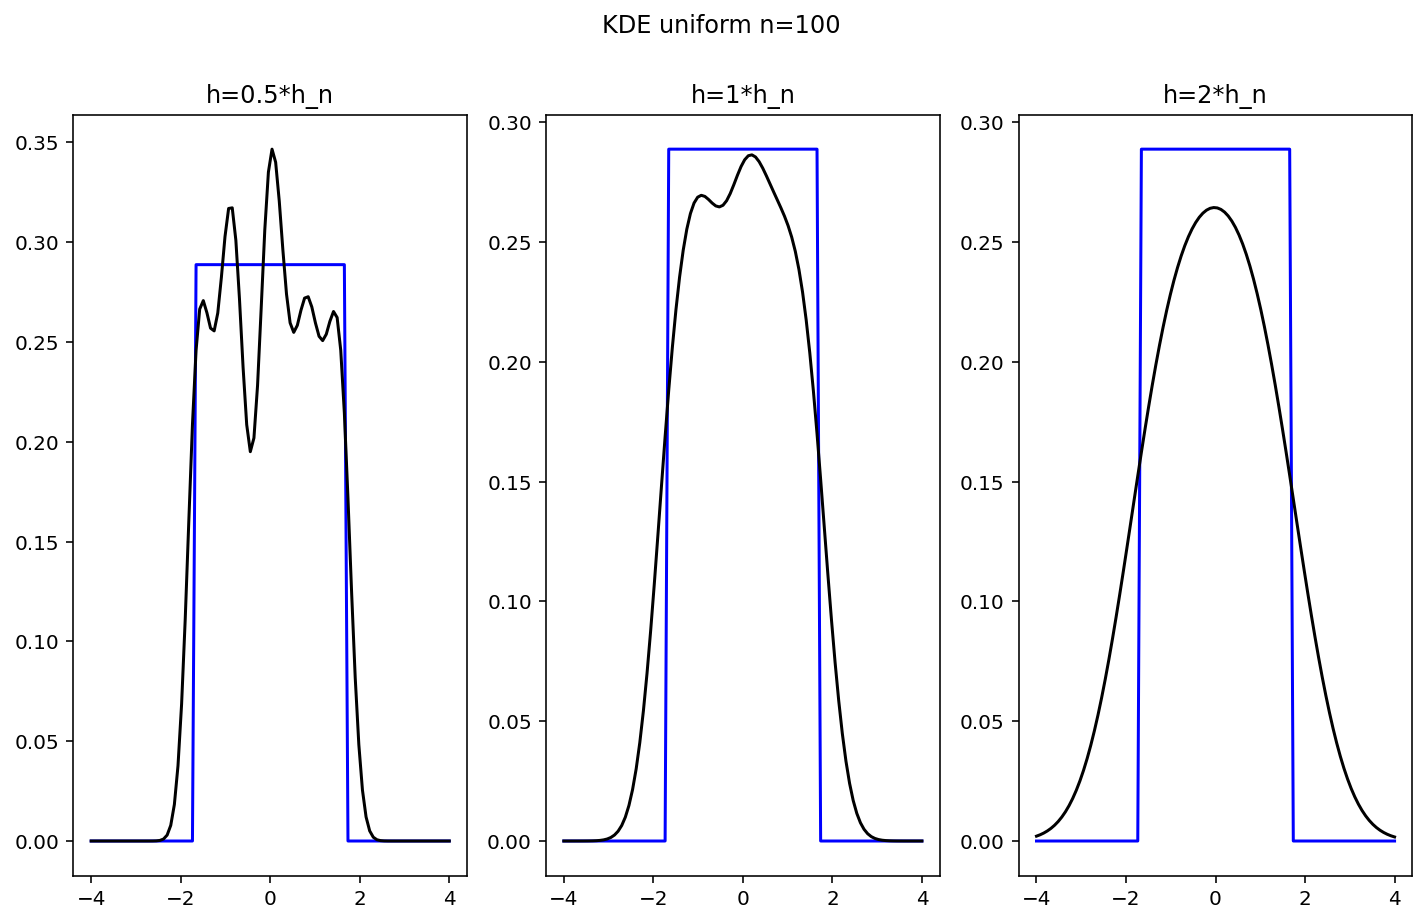

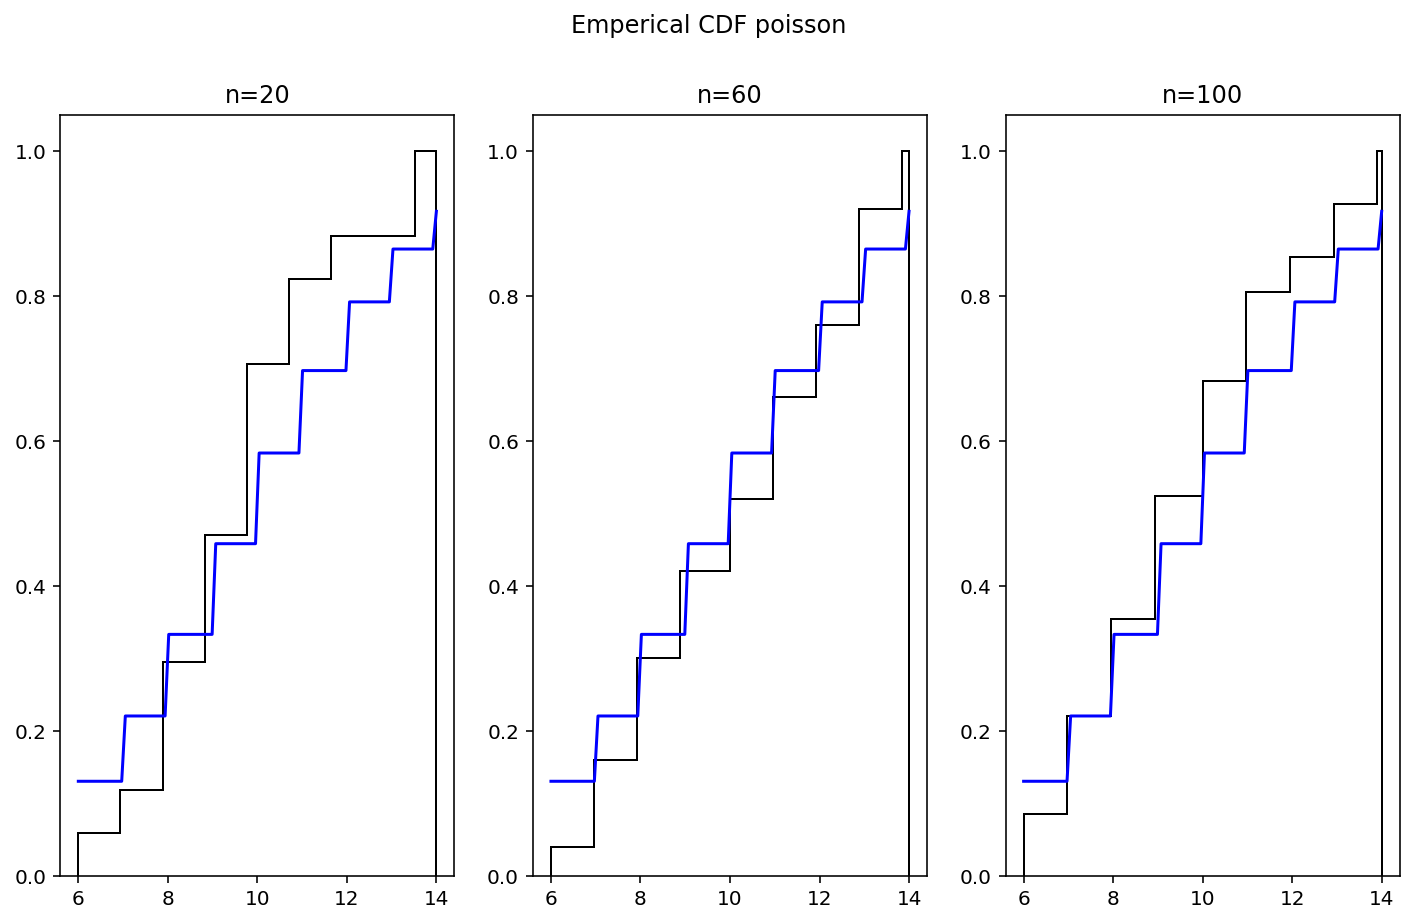

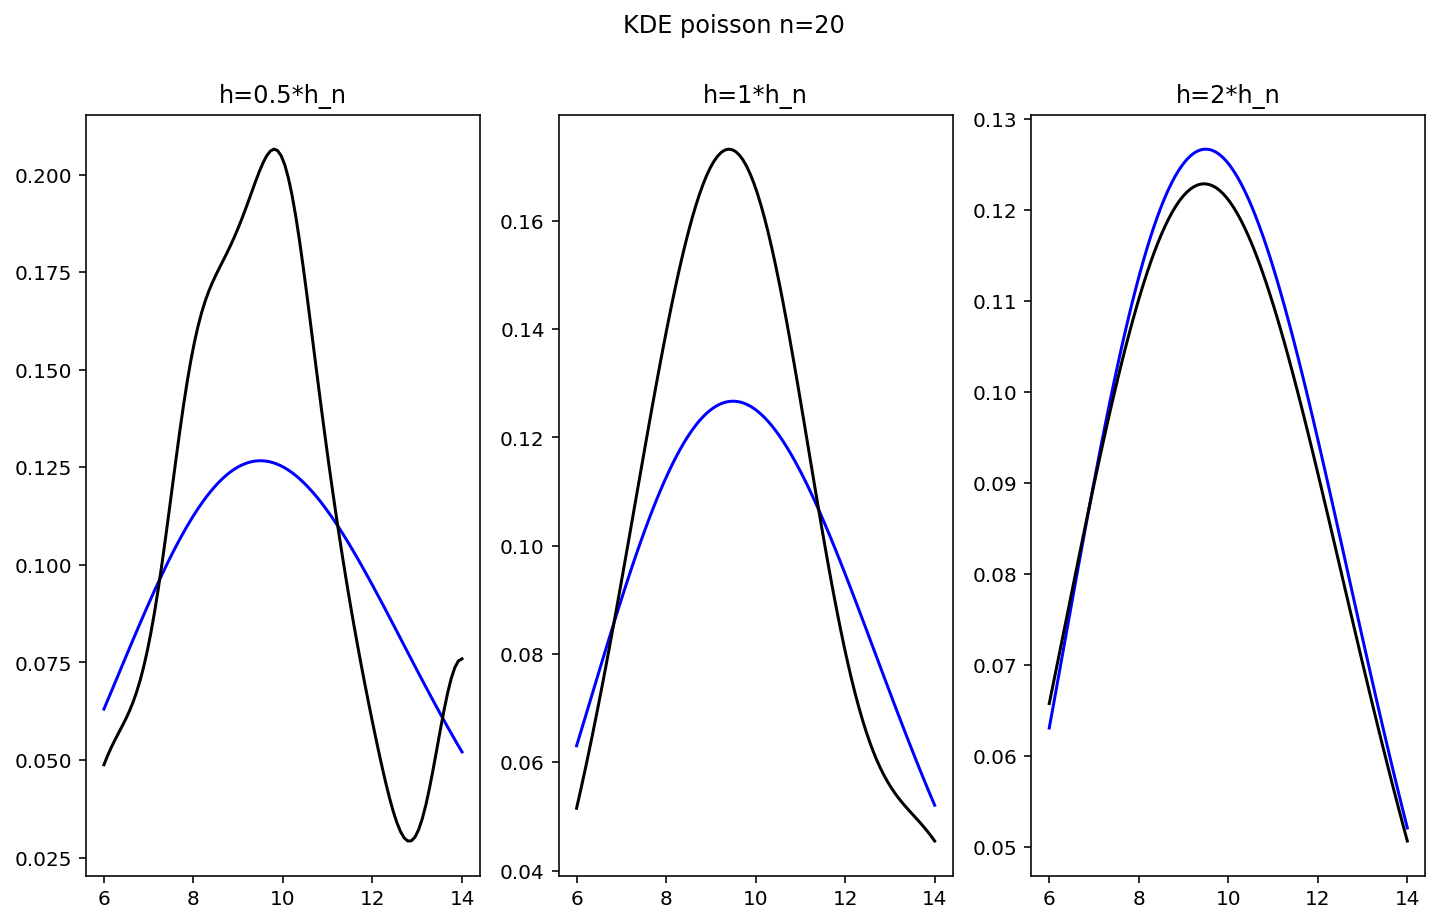

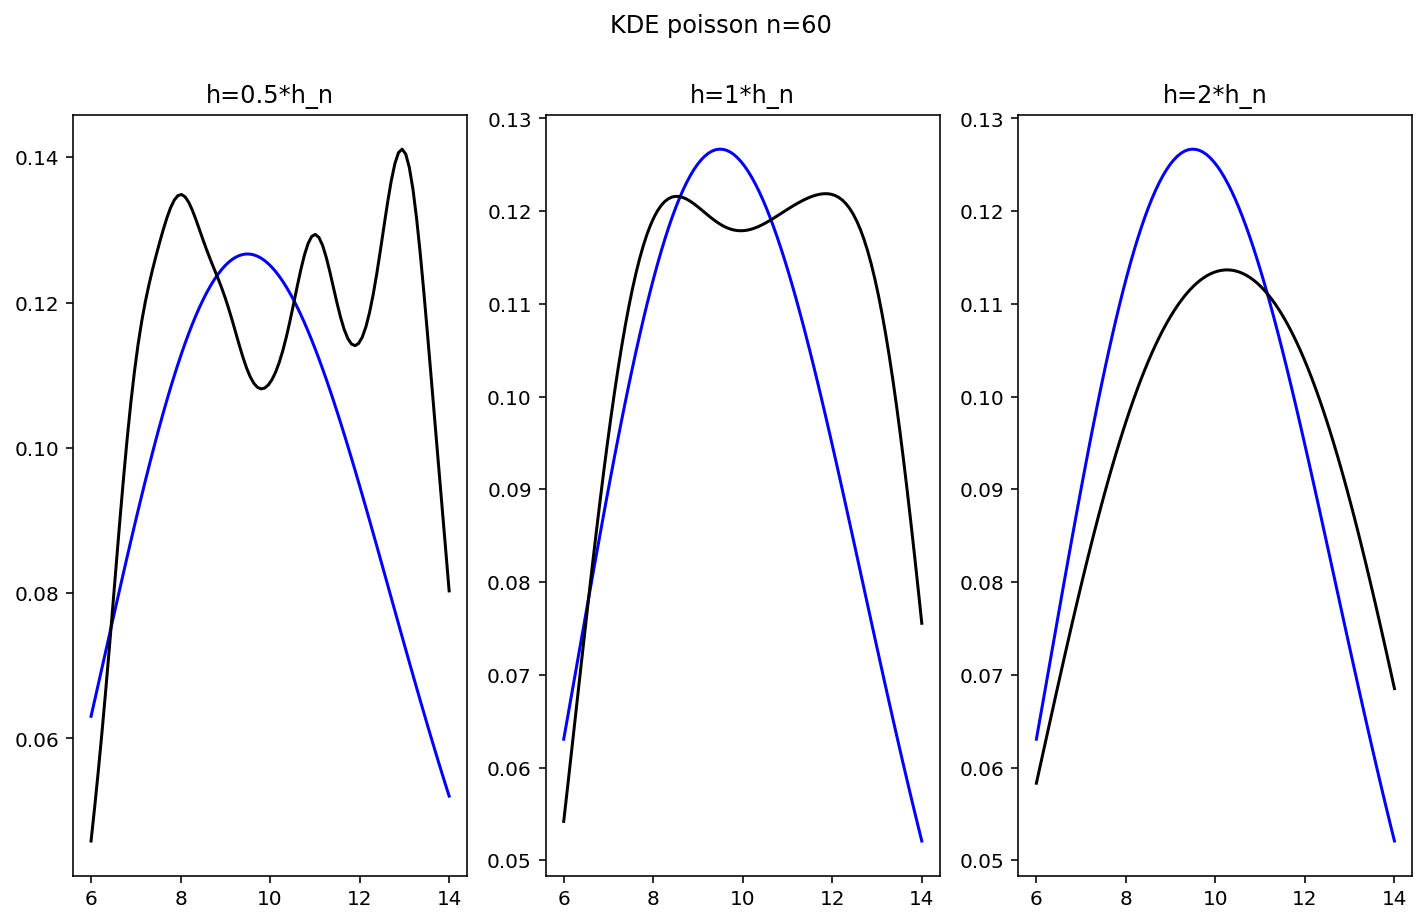

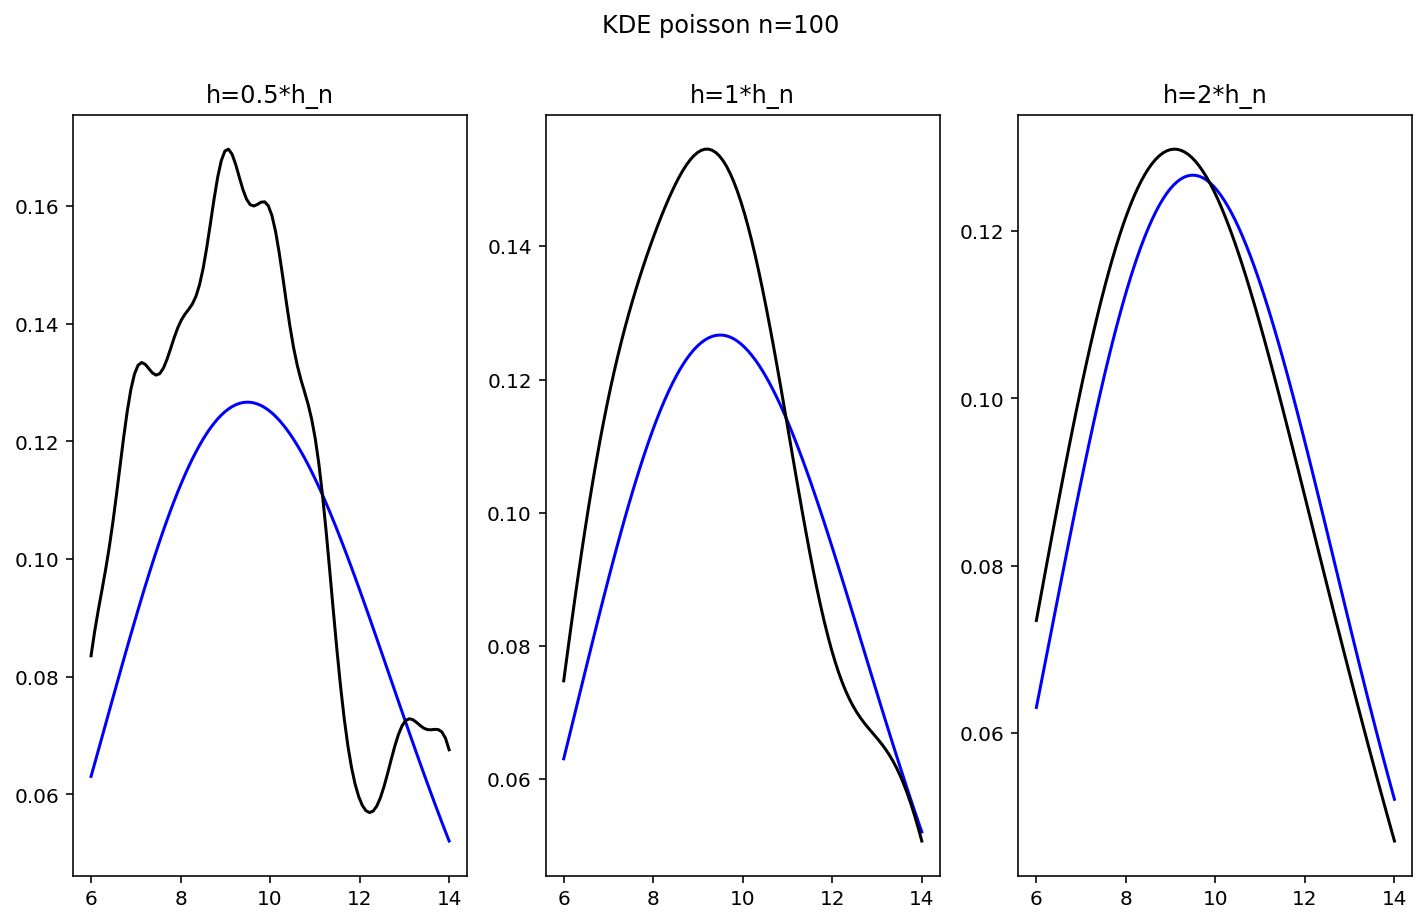

In [3]:
plt.tight_layout()

for distr_name in distr_pdf.keys():
    fig_cdf, ax_cdf = plt.subplots(1, len(power))
    
    for i in range(len(power)):
        if distr_name == 'poisson':
            a, b = 6, 14
        else:
            a, b = -4, 4
        
        n = power[i]
        data = get_values_in_range(np.sort(distr_gen[distr_name](n)), a, b)
        x = np.linspace(a, b, 100)
        
        # эпирические функции
        cdf = distr_cdf[distr_name](x)
        
        ax_cdf[i].set_title('n=' + str(n))
        ax_cdf[i].hist(data, bins = len(data), density = True, histtype = 'step', cumulative = True, color = 'black')
        ax_cdf[i].plot(x, cdf, 'blue')
        
        # ядерные оценки
        h_n = silverman_h(data)
        k = [0.5, 1, 2]
        fig_kde, ax_kde = plt.subplots(1, len(k))
        
        for j in range(len(k)):
            h = k[j] * h_n
            pdf = [distr_pdf[distr_name](xx) for xx in x]
            kde = [KDE(xx, data, h) for xx in x]
            
            ax_kde[j].set_title('h=' + str(k[j]) + '*h_n')
            ax_kde[j].plot(x, pdf, 'blue')
            ax_kde[j].plot(x, kde, 'black')
            
        fig_kde.suptitle('KDE ' + distr_name + ' n=' + str(n))
        fig_kde.savefig('kde_' + distr_name + '_' + str(n))
    
    fig_cdf.suptitle('Emperical CDF ' + distr_name)
    fig_cdf.savefig('cdf_' + distr_name)